<center><img src = "Images/ATU_Logo.jpg"></center>

<h2 style="color: #001a79;">Author: Sam Tracey</h2>
<h2 style="color: #001a79;">Module: Machine Learning and Statistics</h2>
<h2 style="color: #001a79;">Topic 2. Models.</h2>

<hr style="border-top: 1px solid #001a79;" />



In [28]:
# Importing Necessary Modules
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Nicer colours and styles for plots.
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['figure.dpi'] = 80

In [41]:
# Create some fake data representing weight and distance
# Use seed to generate redictable random numbers.
np.random.seed(0)
# Independent variable - weight.
weight = np.arange(0.0, 21.0, 1.0)

# Dependent variable - distance with random noise added.
distance = 5.0 * weight + 10.0 + np.random.normal(0.0, 2.0, weight.size)

In [44]:
# Look at the weight values.
weight

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.])

In [45]:
# Look at the distance values.
distance

array([ 13.52810469,  15.80031442,  21.95747597,  29.4817864 ,
        33.73511598,  33.04544424,  41.90017684,  44.69728558,
        49.7935623 ,  55.821197  ,  60.28808714,  67.90854701,
        71.52207545,  75.24335003,  80.88772647,  85.66734865,
        92.98815815,  94.58968347, 100.6261354 , 103.29180852,
       104.89402037])

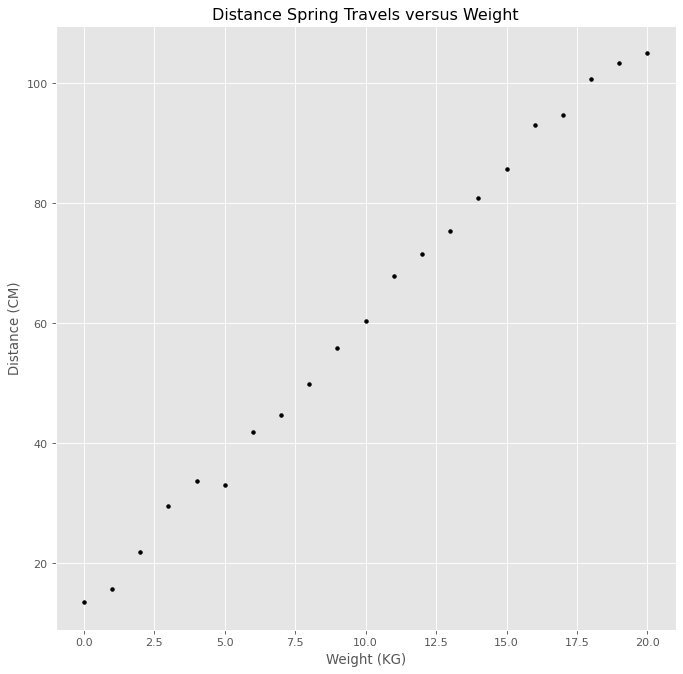

In [46]:
# Create the plot.

plt.plot(weight, distance, 'k.')

# Set some properties for the plot.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')
plt.title('Distance Spring Travels versus Weight')

# Show the plot.
plt.show()

<h3 style="color: rgb(0, 91, 94);">Minimising the cost</h3>

For our given data set we can plot the cost value/function.


$$ Cost(m, c) = \sum_i (y_i - mx_i - c)^2 $$



In [47]:
# Calculate the best values for m and c.

# First calculate the means (a.k.a. averages) of w and d.
w_avg = np.mean(weight)
d_avg = np.mean(distance)

# Subtract means from w and d.
w_zero = weight - w_avg
d_zero = distance - d_avg

# The best m is found by the following calculation.
m = np.sum(w_zero * d_zero) / np.sum(w_zero * w_zero)
# Use m from above to calculate the best c.
c = d_avg - m * w_avg

print("m is %8.6f and c is %6.6f." % (m, c))

m is 4.815516 and c is 12.686140.


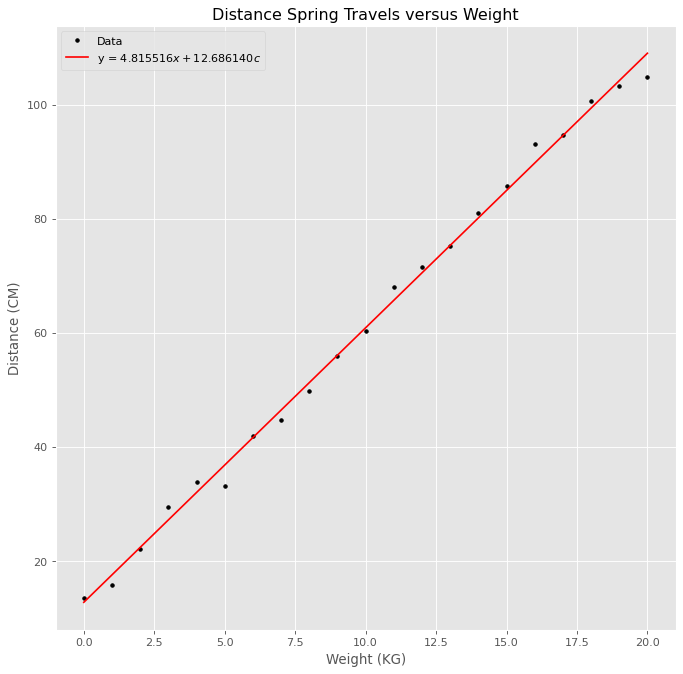

In [52]:
# Plot w versus d with black dots.
plt.plot(weight, distance, 'k.', label="Data")

# Overlay best fitted line based on m and c calculated above.
x = np.arange(0.0, 21.0, 1.0)
plt.plot(x, m * x + c, 'r-', label=r"y = $4.815516x + 12.686140c$")


# Add a legend.
plt.legend()

# Add axis labels.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')
plt.title('Distance Spring Travels versus Weight')

# Show the plot.
plt.show()

In [50]:
# Using Numpy to calculate best m and c values.
np.polyfit(weight, distance, 1)

array([ 4.8155165, 12.68614  ])

In [54]:
# Create cost function.
cost = lambda m,c: np.sum([(distance[i] - m * weight[i] - c)**2 for i in range(weight.size)])
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (m, c, cost(m, c)))

Cost with m =  4.82 and c = 12.69:    68.76


<h3 style="color: #001a79;">Exercise</h3>

<hr style="border-top: 1px solid #001a79;" />


Use numpy and matplotlib to plot the absolute value function.

Research and explain why the absolute value function is not typically used in fitting straight lines to data.

<h3 style="color: #001a79;">The Absolute Value Function</h3>



The first graph below shows the parent absolute value function y=|x|. Each function family has a parent function. The is the simplest version of the function family and shows the features of that family. The key characteristic of the absolute value function is the distinct v shape. This shape indicates the function involves taking the absolute value. The point where the graph changes direction, at the bottom of the v for the parent function. When it is at the bottom like this, it is called a minimal vertex. If the vertex is at the top, it is called a maximal vertex.

The General form of an absolute value equation is:

$$f(x)=a∣x−h∣+k$$

<br>
The variable $a$ tells us how far the graph stretches vertically, and whether the graph opens up or down. The variables $h$ and $k$ tell us how far the graph shifts horizontally and vertically.

In [66]:
# Create array with both negative and positive integers.
x = np.random.randint(-20, 20, 100)

In [67]:
# Create second array with absolute values of x
y = abs(x)

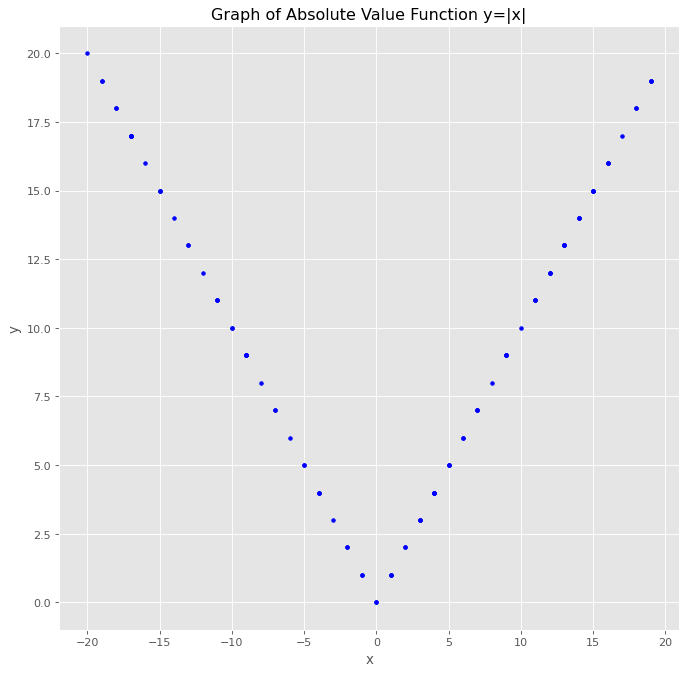

In [74]:
# Create the plot.

plt.plot(x, y, 'b.')
# Set some properties for the plot.
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of Absolute Value Function y=|x|')


# Show the plot.
plt.show()

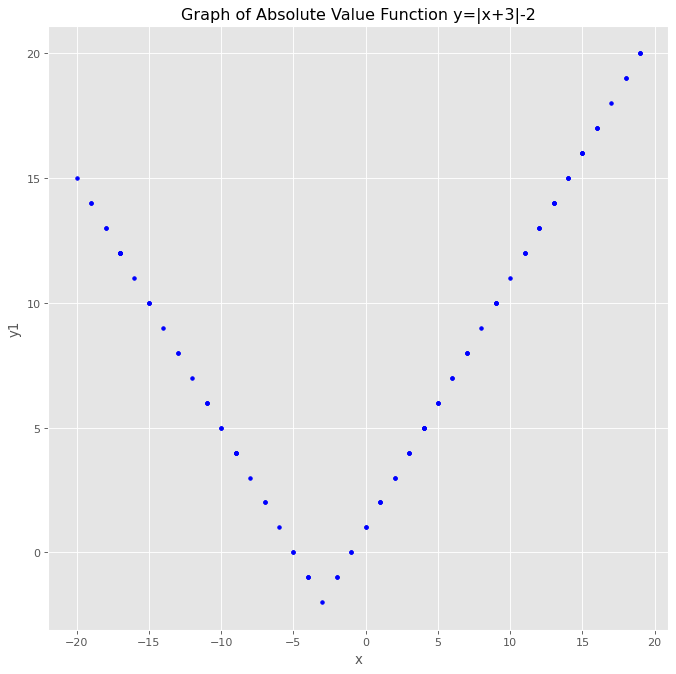

In [78]:
# Create the plot.
y1 = abs(x+3)-2
plt.plot(x, y1, 'b.')
# Set some properties for the plot.
plt.xlabel('x')
plt.ylabel('y1')
plt.title('Graph of Absolute Value Function y=|x+3|-2')


# Show the plot.
plt.show()

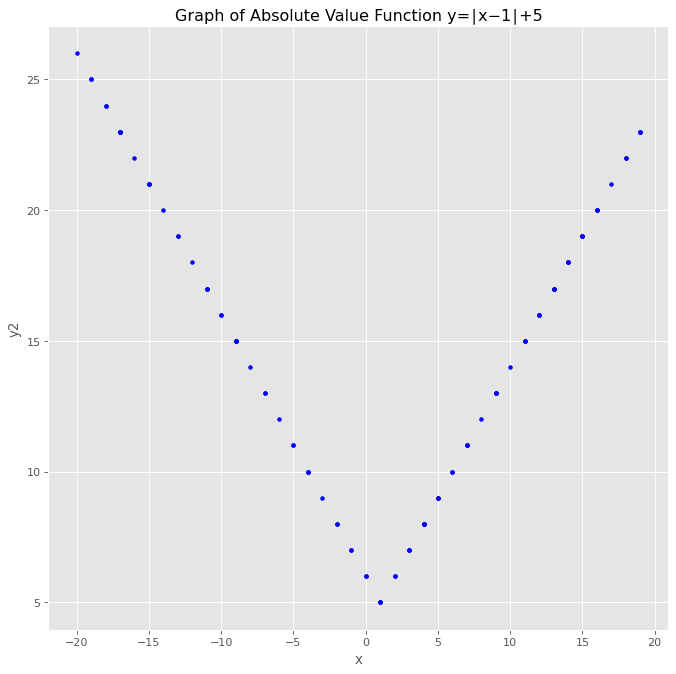

In [79]:
# Create the plot.
y2 = abs(x-1)+5
plt.plot(x, y2, 'b.')
# Set some properties for the plot.
plt.xlabel('x')
plt.ylabel('y2')
plt.title('Graph of Absolute Value Function y=∣x−1∣+5')


# Show the plot.
plt.show()

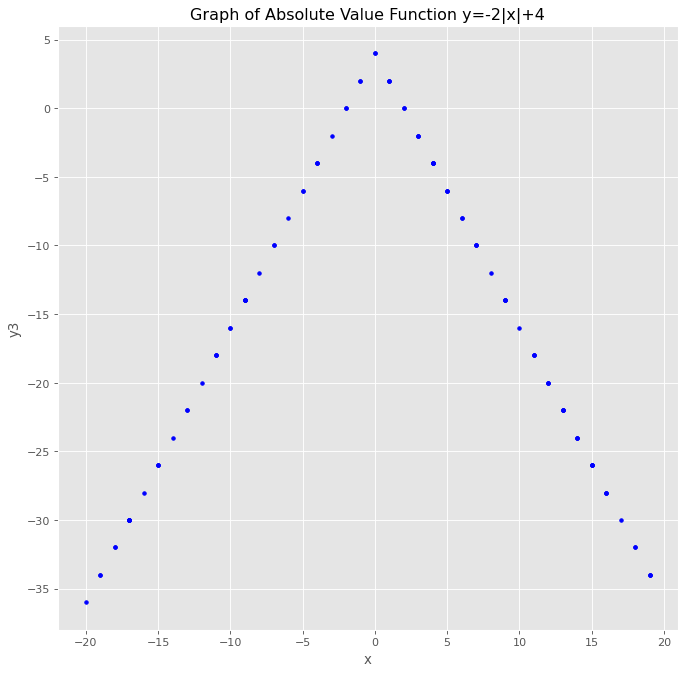

In [83]:
# Create the plot.
y3 = -2*abs(x)+4
plt.plot(x, y3, 'b.')
# Set some properties for the plot.
plt.xlabel('x')
plt.ylabel('y3')
plt.title('Graph of Absolute Value Function y=-2|x|+4')


# Show the plot.
plt.show()

***
### End of Notebook